# 决策树简介

&emsp;&emsp;决策树的思想就是程序设计中的分支结构if-else，决策树是一种分类学习方法；
- 一种树形结构，本质是一颗由多个判断结点组成的树；
- 每个内部结点表示一个属性上的判断；
- 每个分支代表一个判断结果的输出；
- 叶结点代表分类结果；

# 决策树分类原理

## 熵

&emsp;&emsp;在物理学上，熵是“混乱”程度的度量。系统越有序，熵值越低，系统越混乱，熵值越高。
- （1）从信息的完整性进行描述：
    - 当系统有序状态一致时，数据越集中的地方，熵值越小，数据越分散的地方，熵值越大；
- （2）从信息的有序性上进行分析：
    - 当数据一致时，系统越有序，熵值越低；系统越混乱或者分散时，熵值越高；

信息熵是度量样本集合纯度最常用的一种指标：
$$
\operatorname{Ent}(D)=-\sum_{k=1}^{n} \frac{C^{k}}{D} \log \frac{C^{k}}{D}=-\sum_{k=1}^{n} p_{k} \log _{2} p_{k}=-p_{1} \log _{2} p_{1}-p_{2} \log _{2} p_{2}-\ldots-p_{n} \log _{2} p_{n}
$$

***
## 决策树的划分依据（1）——信息增益

定义：使⽤划分前后集合熵的差值来衡量使⽤当前特征对于样本集合D划分效果的好坏（信息增益 = entroy(前) - entroy(后)）  
公式：
$$
\operatorname{Gain}(D, a)=\operatorname{Ent}(D)-\operatorname{Ent}(D \mid a)=\operatorname{Ent}(D)-\sum_{v=1}^{V} \frac{D^{v}}{D} \operatorname{Ent}\left(D^{v}\right)
$$  
(特征a对训练数据集D的信息增益Gain(D,a),定义为集合D的信息熵Ent(D)与给定特征a条件下D的信息条件熵Ent(D∣a)之差)  


具体流程：（一般用于的 ID3 决策树学习算法）  
- 计算类别信息熵
- 计算属性的信息熵
- 计算属性信息增益
- 做比较

ID3 算法缺点：
- [x] ID3算法在选择根节点和各内部节点中的分⽀属性时，采⽤信息增益作为评价标准。信息增益的缺点是倾向于选择取值较多的属性，在有些情况下这类属性可能不会提供太多有价值的信息。
- [x] ID3算法只能对描述属性为离散型属性的数据集构造决策树。

***
##  决策树的划分依据（2）——信息增益率

&emsp;&emsp;若将编号也作为一个候选划分属性，再使用信息增益就会有所误差，因为信息增益准则对可取值数⽬较多的属性有所偏好，为减少这种偏好可能带来的不利影响，著名的 C4.5 决策树算法不直接使⽤信息增益，⽽是使⽤"增益率" (gain ratio) 来选择最优划分属性。

增益率：
$$
\operatorname{Gain}_{-} \operatorname{ratio}(D, a)=\frac{\operatorname{Gain}(D, a)}{I V(a)}
$$  
其中：
$$
I V(a)=-\sum_{v=1}^{V} \frac{D^{v}}{D} \log \frac{D^{v}}{D}
$$

算法流程：
- 计算当前结点的类别熵（以类别取值计算）；
- 计算当前阶段的属性熵(按照属性取值下得类别取值计算)
- 计算信息增益
- 计算各个属性的分裂信息度量
- 计算各个属性的信息增益率

使用C4.5决策树的好处：  
- 用信息增益率来选择属性
- 可以处理连续数值型属性
- 采用一种后剪枝方法
- 对于缺失值的处理
- 产⽣的分类规则易于理解，准确率较⾼

缺点：
- 在构造树的过程中，需要对数据集进⾏多次的顺序扫描和排序，因⽽导致算法的低效
- 此外，C4.5只适合于能够驻留于内存的数据集，当训练集⼤得⽆法在内存容纳时程序⽆法运⾏

## 决策树的划分依据（3）——基尼值和基尼指数

&emsp;&emsp;CART 决策树使⽤"基尼指数" (Gini index)来选择划分属性.(CART 是Classification and Regression Tree的简称，这是⼀种著名的决策树学习算法,分类和回归任务都可⽤)。  
基尼值Gini（D）：从数据集D中随机抽取两个样本，其类别标记不⼀致的概率。故，Gini（D）值越⼩，数据集D的纯度越⾼。


基尼值：
$$
\operatorname{Gini}(D)=\sum_{k=1}^{|y|} \sum_{k \neq k} p_{k} p_{k}^{\prime}=1-\sum_{k=1}^{|y|} p_{k}^{2}
$$  

基尼指数：
$$
\text { Gini_index }(D, a)=\sum_{v=1}^{V} \frac{D^{v}}{D} \operatorname{Gini}\left(D^{v}\right)
$$

算法流程：
while(当前节点"不纯")：  
- 1.遍历每个变量的每⼀种分割⽅式，找到最好的分割点
- 2.分割成两个节点N1和N2  
end while  
每个节点⾜够“纯”为⽌
（C4.5不⼀定是⼆叉树，但CART⼀定是⼆叉树）

## 小结


| 名称 | 提出时间 | 分支方式 | 备注 |  
| ---- | -------- | -------- | ---- |  
| ID3  | 1975    | 信息增益 | ID3只能对离散属性的数据集构成决策树 |
| C4.5 | 1993 | 信息增益率 | 优化后解决了ID3分⽀过程中总喜欢偏向选择值较多的属性 |
| CART | 1984 | Gini系数 | 可以进⾏分类和回归，可以处理离散属性，也可以处理连续属性 |

决策树变量的两种类型：
- （1）数字型（Numeric）：变量类型是整数或浮点数，如前⾯例⼦中的“年收⼊”。⽤“>=”，“>”,“<”或“<=”作为分割条件（排序后，利⽤已有的分割情况，可以优化分割算法的时间复杂度）。
- （2） 名称型（Nominal）：类似编程语⾔中的枚举类型，变量只能从有限的选项中选取，⽐如前⾯例⼦中的“婚姻情况”，只能是“单身”，“已婚”或“离婚”，使⽤“=”来分割。


如何评估分割点的好坏：  
- [x] 如果⼀个分割点可以将当前的所有节点分为两类，使得每⼀类都很“纯”，也就是同⼀类的记录较多，那么就是⼀个好分割点。构建决策树采⽤贪⼼算法，只考虑当前纯度差最⼤的情况作为分割点。

***
# cart剪枝

## 为什么要剪枝
&emsp;&emsp;剪枝 (pruning)是决策树学习算法对付"过拟合"的主要⼿段。在决策树学习中，为了尽可能正确分类训练样本，结点划分过程将不断重复，有时会造成决策树分⽀过多，这时就可能因训练样本学得"太好"了（过拟合）。因此，可通过主动去掉⼀些分⽀来降低过拟合的⻛险。
- 噪声、样本冲突，即错误的样本数据
- 特征即属性不能完全作为分类标准
- 巧合的规律性，数据量不够⼤

## 常用剪枝方法

预剪枝：
- 在构建树的同时剪枝；
- 限制节点最小样本数
- 指定数据高度；
- 指定熵值的最小值


后剪枝：
- 将一个树构建完成后，再进行从下往上的剪枝

***
# 特征工程——特征提取

&emsp;&emsp;将任意数据（如文本或图像）转换为可用于机器学习的数字特征（注：特征化是为了计算机更好去理解数据）。

特征提取分类：
- 字典特征提取（特征离散化）
- 文本特征提取
- 图像特征提取（深度学习介绍）

## 字典特征提取

api介绍：
- sklearn.feature_extraction
- sklearn.feature_extraction.DictVectorizer(sparse=True,…)
    - DictVectorizer.fit_transform(X)
        - X:字典或者包含字典的迭代器返回值
        - 返回sparse矩阵
    - DictVectorizer.get_feature_names() 返回类别名称

In [1]:
from sklearn.feature_extraction import DictVectorizer

#获取数据
data = [{'city': '北京','temperature':100}, {'city': '上海','temperature':60}, {'city': '深圳','temperature':30}]

#实例化一个转换器
transfer = DictVectorizer(sparse=False)
#特征训练
data=transfer.fit_transform(data)

print("返回结果：\n",data)

print("特征名称：\n",transfer.get_feature_names())

返回结果：
 [[  0.   1.   0. 100.]
 [  1.   0.   0.  60.]
 [  0.   0.   1.  30.]]
特征名称：
 ['city=上海', 'city=北京', 'city=深圳', 'temperature']


## 英文文本特征提取
api介绍：
- sklearn.feature_extraction.text.CountVectorizer(stop_words=[])
    - 返回词频矩阵
    - CountVectorizer.fit_transform(X)
        - X:⽂本或者包含⽂本字符串的可迭代对象
        - 返回值:返回sparse矩阵
    - CountVectorizer.get_feature_names() 返回值:单词列表
- sklearn.feature_extraction.text.TfidfVectorizer

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

#获取数据
data = ["life is short,i like like python", "life is too long,i dislike python"]
#实例化转换器
transfer=CountVectorizer()
#文本特征转换
newdata=transfer.fit_transform(data)

#查看特征名称
names=transfer.get_feature_names()
print("特征名称是：\n",names)
print(newdata.toarray())

特征名称是：
 ['dislike', 'is', 'life', 'like', 'long', 'python', 'short', 'too']
[[0 1 1 2 0 1 1 0]
 [1 1 1 0 1 1 0 1]]


## 中文文本特征提取

因为CountVetorizer只能根据空格分词，所以当引入中文时，无法进行分词！
解决方法：
- 准备句子，利用jieba.cut进行分词
- 实例化CountVetorizer
- 将分词结果变成字符串当作fit_transform的输入值

In [3]:
import jieba

#对中文进行分词
def cut_word(text):
    # ⽤结巴对中⽂字符串进⾏分词
    text = " ".join(list(jieba.cut(text)))
    return text

#获取数据
data = ["⼀种还是⼀种今天很残酷，明天更残酷，后天很美好，但绝对⼤部分是死在明天晚上，所以每个⼈不要放弃今天。",
        "我们看到的从很远星系来的光是在⼏百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。",
        "如果只⽤⼀种⽅式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。"]
#将原始数据转换成分好词的形式
text_list=[]
for sent in data:
    text_list.append(cut_word(sent))
print(text_list)

#实例化一个转换器(⾥⾯依旧可以使⽤停⽤词，进⾏词语的限制)
transfer=CountVectorizer()
#调用
data=transfer.fit_transform(text_list)
print("文本特征提取结果：\n",data.toarray())
print("返回特征名字：\n",transfer.get_feature_names())

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\老大\AppData\Local\Temp\jieba.cache
Loading model cost 0.578 seconds.
Prefix dict has been built successfully.


['⼀ 种 还是 ⼀ 种 今天 很 残酷 ， 明天 更 残酷 ， 后天 很 美好 ， 但 绝对 ⼤ 部分 是 死 在 明天 晚上 ， 所以 每个 ⼈ 不要 放弃 今天 。', '我们 看到 的 从 很 远 星系 来 的 光是在 ⼏ 百万年 之前 发出 的 ， 这样 当 我们 看到 宇宙 时 ， 我们 是 在 看 它 的 过去 。', '如果 只 ⽤ ⼀ 种 ⽅ 式 了解 某样 事物 ， 你 就 不会 真正 了解 它 。 了解 事物 真正 含义 的 秘密 取决于 如何 将 其 与 我们 所 了解 的 事物 相 联系 。']
文本特征提取结果：
 [[0 1 0 0 0 2 0 0 0 1 0 0 0 0 0 1 1 2 0 1 0 2 1 0 0 0 0 1 1 0 0 1 0 1]
 [0 0 1 0 0 0 1 1 0 0 0 0 0 1 3 0 0 0 1 0 0 0 0 1 2 0 0 0 0 0 1 0 1 0]
 [1 0 0 4 3 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 2 1 0 0 1 0 0 0 0]]
返回特征名字：
 ['不会', '不要', '之前', '了解', '事物', '今天', '光是在', '发出', '取决于', '后天', '含义', '如何', '如果', '宇宙', '我们', '所以', '放弃', '明天', '星系', '晚上', '某样', '残酷', '每个', '百万年', '看到', '真正', '秘密', '绝对', '美好', '联系', '过去', '还是', '这样', '部分']


## Tf-idf文本特征提取

主要思想：
- 如果某个词或短语在⼀篇⽂章中出现的概率⾼，并且在其他⽂章中很少出现，则认为此词或者短语具有很好的
- 类别区分能⼒，适合⽤来分类


ti-idf分别是什么意思：
- tf -- 词频
- idf -- 逆向⽂档频率

api：
- sklearn.feature_extraction.text.TfidfVectorizer  
（注意：分类机器学习算法进⾏⽂章分类中前期数据处理⽅式）

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

#获取数据
data = ["⼀种还是⼀种今天很残酷，明天更残酷，后天很美好，但绝对⼤部分是死在明天晚上，所以每个⼈不要放弃今天。",
        "我们看到的从很远星系来的光是在⼏百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。",
        "如果只⽤⼀种⽅式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。"]
# 将原始数据转换成分好词的形式
text_list = []
for sent in data:
    text_list.append(cut_word(sent))
print(text_list)
# 1、实例化⼀个转换器类
transfer = TfidfVectorizer(stop_words=['⼀种', '不会', '不要'])
# 2、调⽤fit_transform
data = transfer.fit_transform(text_list)
print("⽂本特征抽取的结果：\n", data.toarray())
print("返回特征名字：\n", transfer.get_feature_names())

['⼀ 种 还是 ⼀ 种 今天 很 残酷 ， 明天 更 残酷 ， 后天 很 美好 ， 但 绝对 ⼤ 部分 是 死 在 明天 晚上 ， 所以 每个 ⼈ 不要 放弃 今天 。', '我们 看到 的 从 很 远 星系 来 的 光是在 ⼏ 百万年 之前 发出 的 ， 这样 当 我们 看到 宇宙 时 ， 我们 是 在 看 它 的 过去 。', '如果 只 ⽤ ⼀ 种 ⽅ 式 了解 某样 事物 ， 你 就 不会 真正 了解 它 。 了解 事物 真正 含义 的 秘密 取决于 如何 将 其 与 我们 所 了解 的 事物 相 联系 。']
⽂本特征抽取的结果：
 [[0.         0.         0.         0.43643578 0.         0.
  0.         0.21821789 0.         0.         0.         0.
  0.         0.21821789 0.21821789 0.43643578 0.         0.21821789
  0.         0.43643578 0.21821789 0.         0.         0.
  0.         0.21821789 0.21821789 0.         0.         0.21821789
  0.         0.21821789]
 [0.2410822  0.         0.         0.         0.2410822  0.2410822
  0.         0.         0.         0.         0.         0.2410822
  0.55004769 0.         0.         0.         0.2410822  0.
  0.         0.         0.         0.2410822  0.48216441 0.
  0.         0.         0.         0.         0.2410822  0.
  0.2410822  0.        ]
 [0.         0.6613748  0.4960311  0.       

***
# 决策树api


class sklearn.tree.DecisionTreeClassifier(criterion=’gini’, max_depth=None,random_state=None)
- criterion
    - 特征选择标准
    - "gini"或者"entropy"，前者代表基尼系数，后者代表信息增益。⼀默认"gini"，即CART算法。
    
    
- min_samples_split
    - 内部节点再划分所需最⼩样本数
    - 这个值限制了⼦树继续划分的条件，如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进⾏划分。 默认是2.如果样本量不⼤，不需要管这个值。如果样本量数量级⾮常⼤，则推荐增⼤这个值。我之前的⼀个项⽬例⼦，有⼤概10万样本，建⽴决策树时，我选择了min_samples_split=10。可以作为参考。
    
    
- min_samples_leaf
     - 叶⼦节点最少样本数
     - 这个值限制了叶⼦节点最少的样本数，如果某叶⼦节点数⽬⼩于样本数，则会和兄弟节点⼀起被剪枝。默认是1,可以输⼊最少的样本数的整数，或者最少样本数占样本总数的百分⽐。如果样本量不⼤，不需要管这个值。如果样本量数量级⾮常⼤，则推荐增⼤这个值。之前的10万样本项⽬使⽤min_samples_leaf的值为5，仅供参考。


- max_depth
    - 决策树最⼤深度
    - 决策树的最⼤深度，默认可以不输⼊，如果不输⼊的话，决策树在建⽴⼦树的时候不会限制⼦树的深度。⼀般来说，数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下，推荐限制这个最⼤深度，具体的取值取决于数据的分布。常⽤的可以取值10-100之间
    

- random_state
    - 随机数种⼦
***

决策树可视化api：
- sklearn.tree.export_graphviz()


- 决策树的优缺点：
    - 优点：简单的理解和解释，树⽊可视化
    - 缺点：决策树学习者可以创建不能很好地推⼴数据的过于复杂的树,容易发⽣过拟合

# 案例：泰坦尼克号乘客生存预测

## 步骤分析

- 1.获取数据
- 2.数据基本处理
    - 2.1 确定特征值,⽬标值
    - 2.2 缺失值处理
    - 2.3 数据集划分
- 3.特征⼯程(字典特征抽取)
- 4.机器学习(决策树)
- 5.模型评估

# 回归决策树

决策树可以分为两大类：
- 分类决策树和回归决策树
- 前者用于处理离散型数据，后者用于处理连续型数据

回归决策树算法总结：
- 输入：训练数据集D
- 输出：回归树f(x).
- 流程：在训练数据集所在的输⼊空间中，递归的将每个区域划分为两个⼦区域并决定每个⼦区域上的输出值，构建⼆叉决策树：
    - （1）选择最优切分特征j与切分点s，求解
$$
\min _{j, s}\left[\min _{c_{1}} \sum_{x_{i} \in R_{1}(j, s)}\left(y_{i}-c_{1}\right)^{2}+\min _{c_{2}} \sum_{x_{i} \in R_{2}(j, s)}\left(y_{i}-c_{2}\right)^{2}\right]
$$  
    - 遍历特征j,对固定的切分特征j扫描切分点s,选择使得上式达到最⼩值的对(j, s).

    - （2）⽤选定的对(j, s)划分区域并决定相应的输出值：
$$
\begin{array}{c}
R_{1}(j, s)=x\left|x^{(j)} \leq s, R_{2}(j, s)=x\right| x^{(j)}>s \\
\hat{c_{m}}=\frac{1}{N} \sum_{x_{1} \in R_{m}(j, s)} y_{i}, x \in R_{m}, m=1,2
\end{array}
$$
    - （3）继续对两个⼦区域调⽤步骤（1）和（2），直⾄满⾜停⽌条件。
    - （4）将输⼊空间划分为M个区域R1, R2 , ..., RM , ⽣成决策树：
$$
f(x)=\sum_{m=1}^{M} \hat{c}_{m} I\left(x \in R_{m}\right)
$$

## 回归决策树和线性回归对比

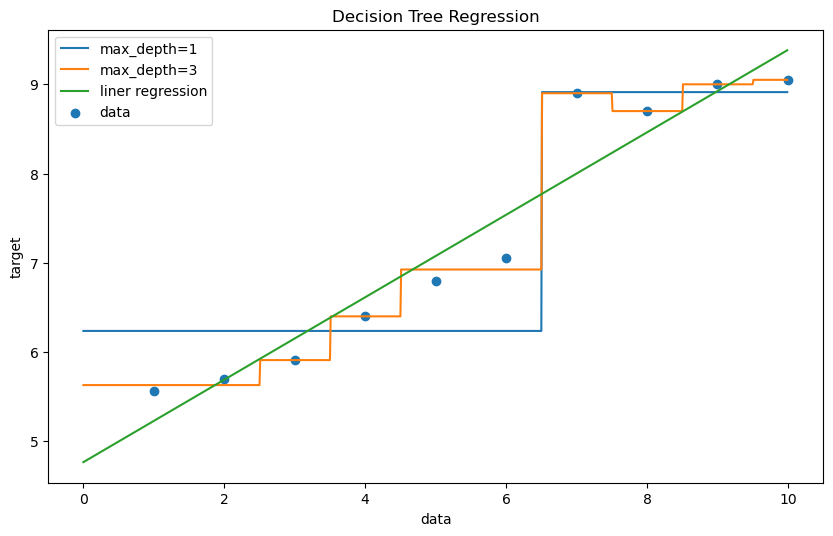

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

# ⽣成数据
x = np.array(list(range(1, 11))).reshape(-1, 1)
y = np.array([5.56, 5.70, 5.91, 6.40, 6.80, 7.05, 8.90, 8.70, 9.00, 9.05])

# 训练模型
model1 = DecisionTreeRegressor(max_depth=1)
model2 = DecisionTreeRegressor(max_depth=3)
model3 = linear_model.LinearRegression()
model1.fit(x, y)
model2.fit(x, y)
model3.fit(x, y)

# 模型预测
X_test = np.arange(0.0, 10.0, 0.01).reshape(-1, 1) # ⽣成1000个数,⽤于预测模型
X_test.shape
y_1 = model1.predict(X_test)
y_2 = model2.predict(X_test)
y_3 = model3.predict(X_test)

# 结果可视化
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(x, y, label="data")
plt.plot(X_test, y_1,label="max_depth=1")
plt.plot(X_test, y_2, label="max_depth=3")
plt.plot(X_test, y_3, label='liner regression')

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()

plt.show()
#当决策树深度为3时，有点发生过拟合的现象